In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

mu = 0.01
dt = 0.005
D = 2
x0, y0 = 0,1
vx0, vy0 = 0, .5

def get_pos(t=0):
    x, y, vx, vy = x0, y0, vx0, vy0
    while x**2+y**2 < d:
        t += dt
        x += vx * dt
        y += vy * dt
        vx += 
        
        yield x, y

In [6]:
from turtle import *

m = 0.1#6.4/(6.4+2*10**7)
dt = .002
T = 200

def U(x,y):
    return -.5*(x**2+y**2) - (1-m)/((x+m)**2+y**2)**.5 - m/((x-1+m)**2+y**2)**.5

def Ux(x,y):
    return -(m*(-m-x+1))/(y**2+(m+x-1)**2)**1.5 - x - ((1-m)*(-m-x))/(y**2+(m+x)**2)**1.5

def Uy(x,y):
    return m*y/(y**2+(m+x-1)**2)**1.5 + y*(1-m)/(y**2+(m+x)**2)**1.5 - y
    

x0, y0 = 0, 1
xd0, yd0 = 0, 0

t = 0

shape("circle")
shapesize(.3,.3,1)

penup()
setpos(-m*100,0)
dot(15)
setpos(100*(1-m),0)
pendown(),dot(7)
pu()

speed(10)
setpos(x0*100,y0*100)
pendown()
x,y = x0,y0
vx, vy = xd0, yd0

while t<T:
    dvx, dvy = -Ux(x,y)+2*vy, -Uy(x,y)-2*vx
    x,y = x+vx*dt+dvx*dt**2/2, y+vy*dt+dvy*dt**2/2
    vx,vy = vx+dvx*dt, vy+dvy*dt
    t += dt
    setpos(x*100,y*100)

done()


Terminator: 

-1.4817003745697035
-3.0002000000000004
[6.123233995736766e-17, 1.0, 2.195636, -1.4817003745697037]
0.30446400000000007


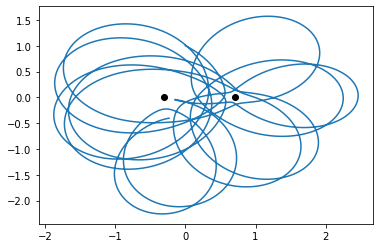

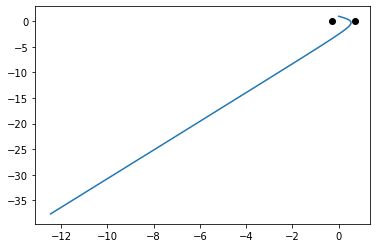

NameError: name 'm' is not defined

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.integrate import odeint

M = .3#6.4/(6.4+2*10**7)
N = 0

def U(x,y,m):
    return -.5*(x**2+y**2) - (1-m)/((x+m)**2+y**2)**.5 - M/((x-1+m)**2+y**2)**.5

def Ux(x,y,m):
    return -(m*(-m-x+1))/(y**2+(m+x-1)**2)**1.5 - x - ((1-m)*(-m-x))/(y**2+(m+x)**2)**1.5

def Uy(x,y,m):
    return m*y/(y**2+(m+x-1)**2)**1.5 + y*(1-m)/(y**2+(m+x)**2)**1.5 - y

def DR(w,t,m):
    x,y, xd, yd = w
    dwdt = [xd, yd, Ux(x,y,m)+2*yd, Uy(x,y,m)-2*xd]
    return dwdt

def D(w,t,m):
    x,y,xd,yd = w
    dwdt = [xd,yd, -x/np.sqrt(x**2+y**2)**3, -y/np.sqrt(x**2+y**2)**3]
    return dwdt

#---------------------------------------------------------------
r=1
th = np.pi/2
E=-1.5001
F = -1.195636
dth = F/r**2-1
dr = -np.sqrt(2*E-F+2*r**2+2/r)
print(dr)
print(dr**2+r**2*dth - r**2 - 2/r)

x0 = r*np.cos(th)
y0 = r*np.sin(th)
dx0 = dr*np.cos(th) - r*np.sin(th)*dth
dy0 = dr*np.sin(th) + r*np.cos(th)*dth

w0 = [x0,y0,dx0,dy0]
print(w0)
print(x0*dy0-y0*dx0+x0**2+y0**2-E)

T = np.linspace(0,30,100000)
sol = odeint(DR,w0,T,args=(M,), atol=1e-10, rtol=1e-10)
#print(sol)
sol_x, sol_y = sol[:,0], sol[:,1]

sol0 = odeint(DR, w0,T,args=(0,), atol=1e-10, rtol=1e-10)
sol0_x, sol0_y = sol0[:,0], sol0[:,1]

plt.plot(sol_x,sol_y,)
plt.plot([-M],[0],'ok')
plt.plot([1-M],[0],'ok')
plt.show()

u0 = [x0,y0,dx0-y0,x0+dy0]
solN = odeint(D,u0,T,args=(M,), atol=1e-10, rtol=1e-10)
solN_x, solN_y = solN[:,0], solN[:,1]

plt.plot(solN_x,solN_y,)
plt.plot([-M],[0],'ok')
plt.plot([1-M],[0],'ok')
plt.show()

# plt.plot(sol0_x,sol0_y,)
# plt.plot([0],[0],'ok')
# plt.show()

U(1,1,m)

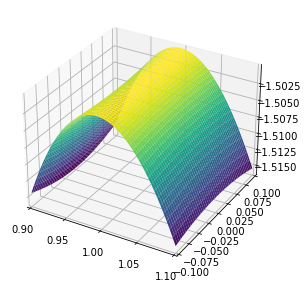

In [20]:
from sympy import var, plot_implicit
from sympy.plotting import plot3d
var('x y')

#plot_implicit(-.5*(x**2+y**2) - (1-m)/((x+m)**2+y**2)**.5 - m/((x-1+m)**2+y**2)**.5+3)
plot3d(-.5*(x**2+y**2) - (1-m)/((x+m)**2+y**2)**.5 - m/((x-1+m)**2+y**2)**.5,(x,.9,1.1),(y,-.1,.1))

-1.71414541816113


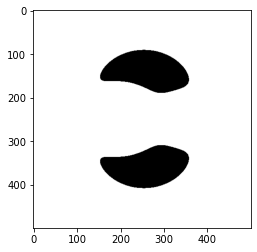

In [16]:
import numpy as np
import matplotlib.pyplot as plt


print(U(1,1,M))

# def ineq(x,y):
#     if x<C:
#         return (0,0,0)
#     else:
#         return (255,255,255)
    

def f(x,y):
    return np.stack((x,np.zeros_like(x),y), axis=2)

# color function, from input (x,y) in the range between 0 and 1
# return an RGB tuple
#f = lambda x,y: np.stack((x,np.zeros_like(x),y), axis=2)

# input grid of values between 0 and 1
# plot function:
N=500
C=-1.55

X,Y = np.meshgrid(np.linspace(-2,2,N),np.linspace(-2,2,N))



Matrix = [[0 for x in range(N)] for y in range(N)] 
for i in range(N):
    for j in range(N):
        if U(X[i,j],Y[i,j],M)>C:
            Matrix[i][j]=(0,0,0)
        else:
            Matrix[i][j]=(255,255,255)

plt.imshow(Matrix)
plt.show()

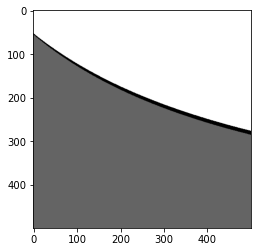

In [3]:
import numpy as np
import matplotlib.pyplot as plt



def f(x,y):
    return np.stack((x,np.zeros_like(x),y), axis=2)

N=500
C=-1.5#-1.500100465

X,Y = np.meshgrid(np.linspace(1.1332506405087153,2.1512124692205443,N),np.linspace(0.01,.9,N))

def F(a,e):
    return -1/(2*a)-np.sqrt(a*(1-e**2))

Matrix = [[0 for x in range(N)] for y in range(N)] 
for i in range(N):
    for j in range(N):
        if F(X[i,j],Y[i,j])>C:
            if -1.1<= (X[i,j]*(1-Y[i,j]**2)-1)/Y[i,j] and (X[i,j]*(1-Y[i,j]**2)-1)/Y[i,j]<=1.1:
                Matrix[i][j]=(100,100,100)#grey if too big energy but good position
            else:
                Matrix[i][j]=(0,0,0)#black if too big energy and bad position
        else: 
            if -1<= (X[i,j]*(1-Y[i,j]**2)-1)/Y[i,j] and (X[i,j]*(1-Y[i,j]**2)-1)/Y[i,j]<=1:
                Matrix[i][j]=(255,0,0)#red if good energy and good position
            else:
                Matrix[i][j]=(255,255,255)#white if good energy but bad position


plt.imshow(Matrix)
plt.show()

[1.618033988749895, 1.1755705045849463, nan, nan]


<ipython-input-1-c97dec40a649>:33: RuntimeWarning: invalid value encountered in sqrt
  dr = np.sqrt(2*E-F**2+2*F*r-2/r)
C:\Users\bucki\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


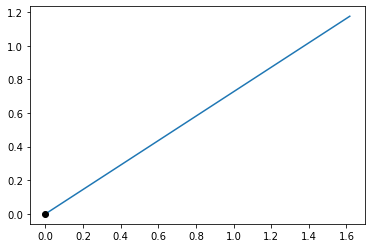

C:\Users\bucki\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


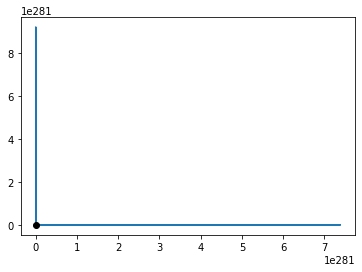

E= nan
-2.5


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.integrate import odeint
#=================================================================================================
def R(x,y):#distance to the origin
    return np.sqrt(x**2+y**2)

def dU(x,y):#rotating potential derivative
    return [-x+x/R(x,y)**3, -y+y/R(x,y)**3]

def dV(x,y):#non-rotating potential derivative
    return [x/R(x,y)**3, y/R(x,y)**3]

def DR(w,t):#rotating vector field
    x,y,dx,dy = w
    Ux, Uy = dU(x,y)
    dw = [dx,dy,2*dy-Ux,-2*dx-Uy]
    return dw

def DN(u,t):#non-rotating vector field
    x,y,dx,dy = u
    Vx,Vy = dV(x,y)
    du = [dx,dy,-Vx,-Vy]
    return du
    
#===================================================================================================
r = 2
th = np.pi/5
E = -1.5001
F = 1.195636
dth = F/r**2 - 1
dr = np.sqrt(2*E-F**2+2*F*r-2/r)
x0, y0 = r*np.cos(th), r*np.sin(th)
dx0, dy0 = dr*np.cos(th)-r*np.sin(th)*dth, dr*np.sin(th)+r*np.cos(th)*dth

#---------------------------------------------------------------------------------------------------

w0 = [x0,y0,dx0,dy0]

#x0,y0,dx0,dy0 = w0#rotating initial conditions
u0 = [x0,y0,dx0-y0,x0+dy0]#non-rotating initial conditions
print(u0)

T = np.linspace(0,20,1000)#time

solR = odeint(DR,w0,T)#rotating solution
solR_x, solR_y = solR[:,0], solR[:,1]

plt.plot(solR_x,solR_y)
plt.plot([0],[0],'ok')
plt.show()

solN = odeint(DN,u0,T)#non-rotating solution
solN_x, solN_y = solN[:,0], solN[:,1]

plt.plot(solN_x, solN_y)
plt.plot([0],[0],'ok')
plt.show()

print('E=', (dx0**2+dy0**2)/2-(x0**2+y0**2)/2-1/R(x0,y0))
print(-r**2/2-1/r)

In [2]:
factor = 7.7857/2.2792
a = 3**(-2/3)*factor
a_min = (3**(-2/3)-.149)*factor
a_max = (3**(-2/3)+.149)*factor
print(a, a_min, a_max)

E = -1.500100465



1.6422315548646298 1.1332506405087153 2.1512124692205443
